In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Dissertation/Swedish restaurants bankruptcy data.csv')
data

,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,...,ROA,Interest_on_Debt,Debt_to_Equity,Equity_to_Assets,ROE,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin
0,5560024712,1998,23163,1287.0,0,30,2,-558.0,358,-379,...,-0.033234,0.095490,1.937042,0.340479,-0.282577,-0.024945,0.836707,-0.204696,-0.212399,-0.073368
1,5560024712,1999,23163,1287.0,0,30,2,-634.0,351,-395,...,-0.046325,0.083369,3.455872,0.224423,-0.495259,-0.014376,0.882155,-0.222300,-0.238079,-0.099229
2,5560024712,2000,23163,1287.0,0,30,2,3809.0,230,-280,...,0.424488,0.059887,0.966104,0.508620,0.776523,1.261605,5.765928,1.370637,1.352285,1.453401
3,5560024712,2001,23163,1287.0,0,30,2,-1147.0,233,-227,...,-0.118748,0.057953,1.036243,0.491100,-0.301587,0.633219,3.108466,-0.435956,-0.433295,-0.347396
4,5560024712,2002,23163,1287.0,0,30,2,-1250.0,241,-218,...,-0.167358,0.062734,1.360611,0.423619,-0.480031,0.123395,1.441584,-0.517598,-0.507660,-0.417805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91296,5567417315,2009,43430,1384.0,0,30,2,134.0,0,-109,...,0.060965,0.052785,15.526316,0.060510,0.187970,0.059331,1.570248,0.029666,0.005535,0.029666
91297,5567417315,2010,43430,1384.0,0,30,2,70.0,0,-80,...,0.033784,0.041005,16.123967,0.058398,-0.090909,0.070132,1.722955,0.014439,-0.002269,0.014439
91298,5567417315,2011,43430,1384.0,0,30,2,125.0,0,-83,...,0.072759,0.053103,10.083871,0.090221,0.270968,0.075104,2.000000,0.025934,0.008714,0.025934
91299,5567417315,2012,43430,1384.0,0,30,2,76.0,0,-100,...,0.070829,0.105708,7.448819,0.118360,-0.196850,0.029966,1.526718,0.018366,-0.006042,0.018366


In [ ]:
data.shape
print(data['ORGNR'].nunique())
data.groupby('Bankrupt')['ORGNR'].nunique()

10696


Bankrupt
0    10688
1      335
Name: ORGNR, dtype: int64

In [ ]:
data.columns

Index(['ORGNR', 'Year', 'ZipCode', 'Municipality', 'Bankrupt',
       'Business_Category', 'Size_Category', 'OperatingProfit',
       'Financial_Income', 'Financial_Expenses',
       ...
       'ROA', 'Interest_on_Debt', 'Debt_to_Equity', 'Equity_to_Assets', 'ROE',
       'WC_to_Sales', 'Quick_ratio', 'Operating_Margin', 'Net_Margin',
       'Profit_Margin'],
      dtype='object', length=102)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
print(data.isna().sum().to_frame('Missing Values').T)

                ORGNR  Year  ZipCode  Municipality  Bankrupt  \
Missing Values      0     0        0           115         0   

                Business_Category  Size_Category  OperatingProfit  \
Missing Values                  0              0                1   

                Financial_Income  Financial_Expenses  Internal_FinPerformance  \
Missing Values                 0                   0                        0   

                Financ_res_Extent  Profit_AfterExp  Taxes  NetProfit  \
Missing Values                  0                2      2          0   

                Intangible FxdA  Machinery&Equipment  Tangible FxdA  \
Missing Values                8                   19              8   

                Financial_Assets  Total_FxdA  Total_CurrA  Total_Assets  \
Missing Values                 8           8           13             0   

                Total_Equity  Untaxed_Reserves  Provisions  Curr_Liabilities  \
Missing Values            13                 0    

### **Altman Model**

Creating subset for Altman

In [ ]:

altman_columns=["ORGNR","Year","Bankrupt","Total_Curr_Liabilities","Total_CurrA","Accumulated_profit","OperatingProfit",'Total_Equity','Total_Assets','Total_Non_curr_lia']
altman_df = data[altman_columns]
altman_df.head()

,ORGNR,Year,Bankrupt,Total_Curr_Liabilities,Total_CurrA,Accumulated_profit,OperatingProfit,Total_Equity,Total_Assets,Total_Non_curr_lia
0,5560024712,1998,0,741.0,673.0,0.0,-558.0,2049.0,6018,3226.0
1,5560024712,1999,0,891.0,850.0,0.0,-634.0,1371.0,6109,3847.0
2,5560024712,2000,0,722.0,4228.0,0.0,3809.0,4630.0,9515,3873.0
3,5560024712,2001,0,756.0,2422.0,3259.0,-1147.0,3780.0,7697,3161.0
4,5560024712,2002,0,505.0,803.0,2409.0,-1250.0,2554.0,6029,2970.0


### Cleaning the altman dataset

In [ ]:
# Working the Duplicates
altman_df.duplicated().sum()

0

In [ ]:
#Missing Values
altman_df[altman_df['Total_Curr_Liabilities'].isna()]


,ORGNR,Year,Bankrupt,Total_Curr_Liabilities,Total_CurrA,Accumulated_profit,OperatingProfit,Total_Equity,Total_Assets,Total_Non_curr_lia
33999,5565116315,2006,0,NaN,1062.0,25.0,388.0,322.0,1534,31.0
82814,5566907712,2007,0,NaN,58.0,0.0,-24.0,76.0,212,0.0


In [ ]:
#Has missing values but considering the size of the dataset  moving on wiithout dealing with missing values, plan to do it in the future if needed
altman_df[altman_df['ORGNR']==5565116315]

,ORGNR,Year,Bankrupt,Total_Curr_Liabilities,Total_CurrA,Accumulated_profit,OperatingProfit,Total_Equity,Total_Assets,Total_Non_curr_lia
33991,5565116315,1998,0,1047.0,336.0,41.0,-29.0,209.0,1667,411.0
33992,5565116315,1999,0,755.0,277.0,3.0,41.0,198.0,1241,288.0
33993,5565116315,2000,0,575.0,270.0,-7.0,179.0,295.0,1179,288.0
33994,5565116315,2001,0,702.0,310.0,81.0,-83.0,200.0,1304,402.0
33995,5565116315,2002,0,790.0,371.0,-14.0,64.0,213.0,1254,252.0
33996,5565116315,2003,0,705.0,377.0,-1.0,39.0,207.0,1109,197.0
33997,5565116315,2004,0,626.0,739.0,-7.0,35.0,222.0,1216,367.0
33998,5565116315,2005,0,808.0,920.0,2.0,327.0,462.0,1376,106.0
33999,5565116315,2006,0,NaN,1062.0,25.0,388.0,322.0,1534,31.0
34000,5565116315,2007,0,801.0,885.0,13.0,129.0,380.0,1256,0.0


In [ ]:
#Datatypes
altman_df.dtypes

ORGNR                       int64
Year                        int64
Bankrupt                    int64
Total_Curr_Liabilities    float64
Total_CurrA               float64
Accumulated_profit        float64
OperatingProfit           float64
Total_Equity              float64
Total_Assets                int64
Total_Non_curr_lia        float64
dtype: object

In [ ]:
altman_df.describe()

,ORGNR,Year,Bankrupt,Total_Curr_Liabilities,Total_CurrA,Accumulated_profit,OperatingProfit,Total_Equity,Total_Assets,Total_Non_curr_lia
count,9.130100e+04,91301.000000,91301.000000,91299.000000,91288.000000,91288.000000,91300.000000,91288.000000,91301.000000,91300.000000
mean,5.565178e+09,2007.711876,0.003669,722.990252,873.600583,187.570480,124.344578,421.429783,1718.533948,441.608226
std,1.549052e+06,6.280128,0.060463,1586.717751,1697.427611,1194.427773,680.585449,1430.375523,3773.196690,1593.543452
min,5.560025e+09,1998.000000,0.000000,-395.000000,-1375.000000,-26540.000000,-33519.000000,-27316.000000,1.000000,-1729.000000
25%,5.564341e+09,2003.000000,0.000000,160.000000,201.000000,-30.000000,-47.000000,75.000000,406.000000,0.000000
50%,5.565522e+09,2007.000000,0.000000,366.000000,434.000000,17.000000,33.000000,165.000000,839.000000,40.000000
75%,5.566355e+09,2012.000000,0.000000,785.000000,932.000000,193.000000,178.000000,439.000000,1759.000000,354.000000
max,5.567417e+09,2021.000000,1.000000,75246.000000,101929.000000,65180.000000,32674.000000,70481.000000,203508.000000,82482.000000


In [ ]:
#Total current liabilites cannot have negative values
altman_df[(altman_df['Total_Curr_Liabilities']<0) | (altman_df['Total_CurrA']<0) | (altman_df['Total_Non_curr_lia']<0)]

,ORGNR,Year,Bankrupt,Total_Curr_Liabilities,Total_CurrA,Accumulated_profit,OperatingProfit,Total_Equity,Total_Assets,Total_Non_curr_lia
731,5560776790,2020,0,-88.0,7.0,932.0,-108.0,95.0,7,0.0
791,5560812827,2000,0,211.0,180.0,84.0,27.0,260.0,491,-14.0
825,5560815457,2018,0,-24.0,508.0,452.0,57.0,616.0,592,0.0
1607,5561237032,2018,0,821.0,2101.0,-1703.0,3630.0,1291.0,2101,-11.0
1896,5561370734,2015,0,-25.0,532.0,466.0,-200.0,569.0,544,0.0
...,...,...,...,...,...,...,...,...,...,...
90417,5567323489,2020,0,-19.0,17.0,-59.0,55.0,95.0,76,0.0
90418,5567323489,2021,0,-18.0,29.0,-5.0,46.0,139.0,120,0.0
91230,5567410682,2021,0,-50.0,341.0,275.0,237.0,477.0,451,0.0
91250,5567412316,2011,0,8.0,-35.0,-523.0,-62.0,61.0,169,100.0


In [ ]:
def count_negatives(column):
  return (column<0).sum()

In [ ]:
df=altman_df.groupby(['ORGNR','Bankrupt'])
print(df.head())

            ORGNR  Year  Bankrupt  Total_Curr_Liabilities  Total_CurrA  \
0      5560024712  1998         0                   741.0        673.0   
1      5560024712  1999         0                   891.0        850.0   
2      5560024712  2000         0                   722.0       4228.0   
3      5560024712  2001         0                   756.0       2422.0   
4      5560024712  2002         0                   505.0        803.0   
...           ...   ...       ...                     ...          ...   
91294  5567417315  2007         0                   239.0        377.0   
91295  5567417315  2008         0                   239.0        377.0   
91296  5567417315  2009         0                   363.0        631.0   
91297  5567417315  2010         0                   379.0        719.0   
91298  5567417315  2011         0                   292.0        654.0   

       Accumulated_profit  OperatingProfit  Total_Equity  Total_Assets  \
0                     0.0           -

In [ ]:
negative_counts = altman_df.groupby(['ORGNR','Bankrupt'])[['Total_Curr_Liabilities','Total_CurrA','Total_Non_curr_lia']].agg(count_negatives)
print(negative_counts)

                     Total_Curr_Liabilities  Total_CurrA  Total_Non_curr_lia
ORGNR      Bankrupt                                                         
5560024712 0                              0            0                   0
5560064403 0                              0            0                   0
5560093576 0                              0            0                   0
5560102369 0                              0            0                   0
5560117029 0                              0            0                   0
...                                     ...          ...                 ...
5567412316 0                              0            2                   0
5567412381 0                              0            0                   0
5567412514 0                              0            0                   0
5567413256 0                              0            0                   0
5567417315 0                              0            0                   0

In [ ]:
# Filter groups where the count of negative values in either column is greater than zero
negative_counts_bankrupt = negative_counts.loc[(slice(None), 1), :]
print(negative_counts_bankrupt.head())
negative_counts_bankrupt = negative_counts_bankrupt.loc[(negative_counts_bankrupt['Total_Curr_Liabilities'] > 0) | (negative_counts_bankrupt['Total_CurrA'] > 0) | (negative_counts_bankrupt['Total_Non_curr_lia'] > 0)]
print(negative_counts_bankrupt)

                     Total_Curr_Liabilities  Total_CurrA  Total_Non_curr_lia
ORGNR      Bankrupt                                                         
5561268979 1                              0            0                   0
5561430447 1                              0            0                   0
5561487421 1                              0            0                   0
5561534693 1                              0            0                   0
5561576280 1                              0            0                   0
                     Total_Curr_Liabilities  Total_CurrA  Total_Non_curr_lia
ORGNR      Bankrupt                                                         
5566031158 1                              1            0                   0
5566106505 1                              1            0                   0


In [ ]:
filtered_altman_df = altman_df[(altman_df['Total_Curr_Liabilities'] >= 0) & (altman_df['Total_CurrA'] >= 0) & (altman_df['Total_Non_curr_lia'] >= 0)]

In [ ]:
print(filtered_altman_df.head())  # Display the first few rows of the new DataFrame
print("Original rows:", altman_df.shape[0])  # Number of rows before filtering
print("Filtered rows:", filtered_altman_df.shape[0])  # Number of rows after filtering


        ORGNR  Year  Bankrupt  Total_Curr_Liabilities  Total_CurrA  \
0  5560024712  1998         0                   741.0        673.0   
1  5560024712  1999         0                   891.0        850.0   
2  5560024712  2000         0                   722.0       4228.0   
3  5560024712  2001         0                   756.0       2422.0   
4  5560024712  2002         0                   505.0        803.0   

   Accumulated_profit  OperatingProfit  Total_Equity  Total_Assets  \
0                 0.0           -558.0        2049.0          6018   
1                 0.0           -634.0        1371.0          6109   
2                 0.0           3809.0        4630.0          9515   
3              3259.0          -1147.0        3780.0          7697   
4              2409.0          -1250.0        2554.0          6029   

   Total_Non_curr_lia  
0              3226.0  
1              3847.0  
2              3873.0  
3              3161.0  
4              2970.0  
Original rows:

In [ ]:
filtered_altman_df['Bankrupt'].value_counts()

Bankrupt
0    90716
1      333
Name: count, dtype: int64

In [ ]:
filtered_altman_df.describe()

,ORGNR,Year,Bankrupt,Total_Curr_Liabilities,Total_CurrA,Accumulated_profit,OperatingProfit,Total_Equity,Total_Assets,Total_Non_curr_lia
count,9.104900e+04,91049.000000,91049.000000,91049.000000,91049.000000,91038.000000,91048.000000,91038.000000,91049.000000,91049.000000
mean,5.565177e+09,2007.699052,0.003657,724.513559,875.070764,187.815429,124.385764,421.709649,1721.686542,442.671957
std,1.549127e+06,6.274539,0.060366,1588.513234,1699.230899,1195.665716,681.151566,1431.958580,3777.697149,1595.552059
min,5.560025e+09,1998.000000,0.000000,0.000000,0.000000,-26540.000000,-33519.000000,-27316.000000,1.000000,0.000000
25%,5.564341e+09,2003.000000,0.000000,160.000000,201.000000,-30.000000,-47.000000,75.000000,407.000000,0.000000
50%,5.565522e+09,2007.000000,0.000000,367.000000,434.000000,17.000000,33.000000,166.000000,841.000000,40.000000
75%,5.566355e+09,2012.000000,0.000000,786.000000,933.000000,193.000000,178.000000,440.000000,1762.000000,355.000000
max,5.567417e+09,2021.000000,1.000000,75246.000000,101929.000000,65180.000000,32674.000000,70481.000000,203508.000000,82482.000000


In [ ]:
filtered_altman_df['X1']=(filtered_altman_df['Total_CurrA']-filtered_altman_df['Total_Curr_Liabilities'])/filtered_altman_df['Total_Assets']

<ipython-input-22-f7851985d349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_altman_df['X1']=(filtered_altman_df['Total_CurrA']-filtered_altman_df['Total_Curr_Liabilities'])/filtered_altman_df['Total_Assets']


In [ ]:
filtered_altman_df['X2']=filtered_altman_df['Accumulated_profit']/filtered_altman_df['Total_Assets']
filtered_altman_df['X2']

<ipython-input-23-9a0ae0c81ae2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_altman_df['X2']=filtered_altman_df['Accumulated_profit']/filtered_altman_df['Total_Assets']


0        0.000000
1        0.000000
2        0.000000
3        0.423412
4        0.399569
           ...   
91296    0.000000
91297    0.015927
91298    0.012224
91299    0.052190
91300    0.098039
Name: X2, Length: 91049, dtype: float64

In [ ]:
filtered_altman_df['X3']=filtered_altman_df['OperatingProfit']/filtered_altman_df['Total_Assets']
filtered_altman_df['X3']

<ipython-input-24-4c72645b112c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_altman_df['X3']=filtered_altman_df['OperatingProfit']/filtered_altman_df['Total_Assets']


0       -0.092722
1       -0.103781
2        0.400315
3       -0.149019
4       -0.207331
           ...   
91296    0.060965
91297    0.033784
91298    0.072759
91299    0.070829
91300    0.031863
Name: X3, Length: 91049, dtype: float64

In [ ]:
filtered_altman_df['X4']=filtered_altman_df['Total_Equity']/(filtered_altman_df['Total_Curr_Liabilities'] + filtered_altman_df['Total_Non_curr_lia'])
filtered_altman_df['X4']

<ipython-input-25-8864ca62adfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_altman_df['X4']=filtered_altman_df['Total_Equity']/(filtered_altman_df['Total_Curr_Liabilities'] + filtered_altman_df['Total_Non_curr_lia'])


0        0.516511
1        0.289363
2        1.007617
3        0.965024
4        0.734964
           ...   
91296    0.064407
91297    0.062019
91298    0.099168
91299    0.134249
91300    0.141259
Name: X4, Length: 91049, dtype: float64

In [ ]:
filtered_altman_df.isna().sum()

ORGNR                      0
Year                       0
Bankrupt                   0
Total_Curr_Liabilities     0
Total_CurrA                0
Accumulated_profit        11
OperatingProfit            1
Total_Equity              11
Total_Assets               0
Total_Non_curr_lia         0
X1                         0
X2                        11
X3                         1
X4                        11
dtype: int64

In [ ]:
infinite_values = filtered_altman_df.isin([np.inf, -np.inf])
inf_count = infinite_values.sum()
print(inf_count)

ORGNR                       0
Year                        0
Bankrupt                    0
Total_Curr_Liabilities      0
Total_CurrA                 0
Accumulated_profit          0
OperatingProfit             0
Total_Equity                0
Total_Assets                0
Total_Non_curr_lia          0
X1                          0
X2                          0
X3                          0
X4                        166
dtype: int64


In [ ]:
filtered_altman_df['Bankrupt'].value_counts()

Bankrupt
0    90716
1      333
Name: count, dtype: int64

In [ ]:
filtered_altman_df=filtered_altman_df.dropna()

In [ ]:
filtered_altman_df.isna().sum()

ORGNR                     0
Year                      0
Bankrupt                  0
Total_Curr_Liabilities    0
Total_CurrA               0
Accumulated_profit        0
OperatingProfit           0
Total_Equity              0
Total_Assets              0
Total_Non_curr_lia        0
X1                        0
X2                        0
X3                        0
X4                        0
dtype: int64

In [ ]:
filtered_altman_df.replace([np.inf, -np.inf], 0, inplace=True)

<ipython-input-31-dddae9a9ee9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_altman_df.replace([np.inf, -np.inf], 0, inplace=True)


In [ ]:
infinite_values = filtered_altman_df.isin([np.inf, -np.inf])
inf_count = infinite_values.sum()
print(inf_count)

ORGNR                     0
Year                      0
Bankrupt                  0
Total_Curr_Liabilities    0
Total_CurrA               0
Accumulated_profit        0
OperatingProfit           0
Total_Equity              0
Total_Assets              0
Total_Non_curr_lia        0
X1                        0
X2                        0
X3                        0
X4                        0
dtype: int64


Applying the model


In [ ]:

filtered_altman_df['z_score']=3.25+filtered_altman_df['X1']*6.56+filtered_altman_df['X2']*3.26+filtered_altman_df['X3']*6.72+filtered_altman_df['X4']*1.05
filtered_altman_df['Predicted_Bankrupt'] = (filtered_altman_df['z_score'] < 1).astype(int)
filtered_altman_df['Predicted_Bankrupt'].value_counts()

<ipython-input-33-f01dca027b03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_altman_df['z_score']=3.25+filtered_altman_df['X1']*6.56+filtered_altman_df['X2']*3.26+filtered_altman_df['X3']*6.72+filtered_altman_df['X4']*1.05
<ipython-input-33-f01dca027b03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_altman_df['Predicted_Bankrupt'] = (filtered_altman_df['z_score'] < 1).astype(int)


Predicted_Bankrupt
0    73265
1    17772
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = filtered_altman_df[['z_score']]  # Features for the model
y = filtered_altman_df['Bankrupt']   # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_pred = (X_test['z_score'] < 1.8).astype(int)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[13736  4408]
 [   24    40]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86     18144
           1       0.01      0.62      0.02        64

    accuracy                           0.76     18208
   macro avg       0.50      0.69      0.44     18208
weighted avg       0.99      0.76      0.86     18208

Accuracy Score: 0.7565905096660809


### **Logistic Regression**

In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
for column in data.columns:
    print(column)

ORGNR
Year
ZipCode
Municipality
Bankrupt
Business_Category
Size_Category
OperatingProfit
Financial_Income
Financial_Expenses
Internal_FinPerformance
Financ_res_Extent
Profit_AfterExp
Taxes
NetProfit
Intangible FxdA
Machinery&Equipment
Tangible FxdA
Financial_Assets
Total_FxdA
Total_CurrA
Total_Assets
Total_Equity
Untaxed_Reserves
Provisions
Curr_Liabilities
Total_Curr_Liabilities
Non_Curr_Liabilities
Total_Non_curr_lia
Total_Equity&Liab
Net_Sales
Other_Oper_incom
Depreciation
Personnel_Expenses
Comparability_items
Other_oper_exp
Total_appropriations
Employees
Sales_per_Employee
VA_per_Employee
Change_in_Sales
Inventory
Salaries
Value_Added
Social_Security
Total_Inventories
Total_receivables
Securities_Investments
CashnBank
Dividend
Production_Costs
rr08d_resand
rr08a_rteinknc
rr08b_rteinext
rr08c_rteinov
rr09a_rtekoknc
rr09b_rtekoext
rr09c_rtekoov
rr13a_extraint
rr13b_extrakos
rr13c_kncbdr
rr13d_agtsk
rr13e_bsldisp
br02a_byggmark
br02b_matanlov
br01a_foubautg
br01b_patlic
br01c_goodwil

In [ ]:

data = data.drop(['Equity_to_Assets', 'ROE'], axis=1)
data.head()

,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,Internal_FinPerformance,Financ_res_Extent,Profit_AfterExp,Taxes,NetProfit,Intangible FxdA,Machinery&Equipment,Tangible FxdA,Financial_Assets,Total_FxdA,Total_CurrA,Total_Assets,Total_Equity,Untaxed_Reserves,Provisions,Curr_Liabilities,Total_Curr_Liabilities,Non_Curr_Liabilities,Total_Non_curr_lia,Total_Equity&Liab,Net_Sales,Other_Oper_incom,Depreciation,Personnel_Expenses,Comparability_items,Other_oper_exp,Total_appropriations,Employees,Sales_per_Employee,VA_per_Employee,Change_in_Sales,Inventory,Salaries,Value_Added,Social_Security,Total_Inventories,Total_receivables,Securities_Investments,CashnBank,Dividend,Production_Costs,rr08d_resand,rr08a_rteinknc,rr08b_rteinext,rr08c_rteinov,rr09a_rtekoknc,rr09b_rtekoext,rr09c_rtekoov,rr13a_extraint,rr13b_extrakos,rr13c_kncbdr,rr13d_agtsk,rr13e_bsldisp,br02a_byggmark,br02b_matanlov,br01a_foubautg,br01b_patlic,br01c_goodwill,br01d_imanlov,br04a_andknc,br04b_lfordknc,br04c_landelag,br04d_fianltov,br06a_pagarb,br06b_lagerov,br06d_kundford,br06e_kfordknc,br06f_kfordov,br10a_aktiekap,br10b_overkurs,br10c_uppskr,br10d_ovrgbkap,Accumulated_profit,br10f_kncbdrel,br10g_agtskel,br10h_resarb,br13a_ksklev,br13b_kskknc,br13c_kskov,br15a_lskknc,br15b_lskov,Asset_Turnover_ratio,ROA,Interest_on_Debt,Debt_to_Equity,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin
0,5560024712,1998,23163,1287.0,0,30,2,-558.0,358,-379,348,-369,-579.0,0.0,-579,0.0,344.0,5344.0,1.0,5345.0,673.0,6018,2049.0,0,0,85.0,741.0,3226.0,3226.0,6018.0,2726,50.0,-96,-1535,0,-1703,0,7,389.0,153.0,NaN,513.0,-1138.0,1073,-397.0,53.0,460.0,0.0,160.0,0,-1485.0,0,0,10,348,0,-379,0.0,0,0,0,0,0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,53.0,267.0,0.0,193.0,2200.0,0.0,425.0,3.0,0.0,0.0,0.0,-579.0,95.0,0.0,561.0,0.0,0.0,0.452974,-0.033234,0.095490,1.937042,-0.024945,0.836707,-0.204696,-0.212399,-0.073368
1,5560024712,1999,23163,1287.0,0,30,2,-634.0,351,-395,348,-392,-679.0,0.0,-679,0.0,258.0,5258.0,1.0,5259.0,850.0,6109,1371.0,0,0,39.0,891.0,3847.0,3847.0,6109.0,2852,60.0,-86,-1818,0,-1642,0,8,357.0,159.0,0.046222,727.0,-1345.0,1270,-473.0,64.0,663.0,0.0,123.0,0,-1408.0,0,0,3,348,0,-395,0.0,0,0,0,0,0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,64.0,443.0,0.0,220.0,1100.0,0.0,0.0,950.0,0.0,0.0,0.0,-679.0,72.0,0.0,780.0,0.0,0.0,0.466852,-0.046325,0.083369,3.455872,-0.014376,0.882155,-0.222300,-0.238079,-0.099229
2,5560024712,2000,23163,1287.0,0,30,2,3809.0,230,-280,229,-279,3758.0,-209.0,3259,0.0,195.0,5195.0,93.0,5288.0,4228.0,9515,4630.0,291,0,43.0,722.0,3873.0,3873.0,9515.0,2779,4560.0,-80,-1959,0,-1491,-290,8,347.0,731.0,-0.025596,4063.0,-1472.0,5848,-487.0,65.0,3998.0,0.0,164.0,0,-1655.0,0,0,1,229,0,-280,0.0,0,0,0,0,-290,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,65.0,350.0,0.0,3648.0,1100.0,0.0,0.0,271.0,0.0,0.0,0.0,3259.0,91.0,0.0,588.0,0.0,0.0,0.292065,0.424488,0.059887,0.966104,1.261605,5.765928,1.370637,1.352285,1.453401
3,5560024712,2001,23163,1287.0,0,30,2,-1147.0,233,-227,200,-194,-1140.0,0.0,-850,0.0,167.0,5167.0,108.0,5275.0,2422.0,7697,3780.0,0,0,47.0,756.0,3161.0,3161.0,7697.0,2631,24.0,-87,-1996,0,-1718,290,8,329.0,117.0,-0.053257,697.0,-1497.0,936,-499.0,72.0,625.0,1519.0,206.0,0,-1828.0,0,0,33,200,0,-227,0.0,0,0,0,0,290,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,0.0,72.0,378.0,0.0,247.0,1100.0,0.0,0.0,271.0,3259.0,0.0,0.0,-850.0,74.0,0.0,635.0,0.0,0.0,0.341821,-0.118748,0.057953,1.036243,0.633219,3.108466,-0.435956,-0.433295,-0.347396
4,5560024712,2002,23163,1287.0,0,30,2,-1250.0,241,-218,194,-171,-1226.0,0.0,-1226,0.0,150.0,5150.0,76.0,5226.0,803.0,6029,2554.0,0,0,52.0,505.0,2970.0,2970.0,6029.0,2415,13.0,-88,-2089,0,-1501,0,8,302.0,116.0,-0.082098,730.0,-1531.0,927,-558.0,75.0,655.0,0.0,73.0,0,-1508.0,0,0,47,194,0,-218,0.0,0,0,0,0,0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.0,75.0,436.0,0.0,219.0,1100.0,0.0,0.0,271.0,2409.0,0.0,0.0,-1226.0,38.0,0.0,415.0,0.0,0.0,0.4

In [ ]:
#Calculating ratios
data['Total_Liabilities'] = data['Total_Curr_Liabilities'] + data['Total_Non_curr_lia']
data['Operating_CF'] = (data['NetProfit'] + data['Depreciation']) - (data['Total_CurrA'] - data['Total_Curr_Liabilities'])
data['Return_on_Assets'] = data['NetProfit'] / data['Total_Assets']
data["RE_to_Assets"] = data["Accumulated_profit"] / data["Total_Assets"]
data['Net_Sales_to_Assets'] = data['Net_Sales'] / data['Total_Assets']
data['EBIT_to_Assets'] = data['OperatingProfit'] / data['Total_Assets']
data['Current_Ratio'] = data['Total_CurrA'] / data['Total_Curr_Liabilities']
data['NetWC_to_Assets'] = (data['Total_CurrA'] - data['Total_Curr_Liabilities']) / data['Total_Assets']
data['Cash_Ratio'] = (data['CashnBank']+data['Securities_Investments']+data['Total_receivables']) / data['Total_Curr_Liabilities']
data["CF_to_debt"] = data["Operating_CF"] / data["Total_Liabilities"]
data["CF_to_Assets"] = data["Operating_CF"] / data["Total_Assets"]
data['debt_ratio']=data['Total_Liabilities']/data['Total_Assets']
data['Current_Asset_Ratio']= data['Total_CurrA' ]/data['Total_Assets']
data['EBIT_to_debt'] = data['OperatingProfit'] / data['Total_Liabilities']
data['Currliabilities_to_assets'] =  data['Total_Curr_Liabilities'] / data['Total_Assets']
data['cash_to_assets']= data['CashnBank'] / data['Total_Assets']
data['cash_to_currliabilities']= data['CashnBank'] / data['Total_Curr_Liabilities']
data['Quick_assets_To_Assets'] = (data['Total_CurrA']-data['Inventory']) / data['Total_Assets']

In [ ]:
data['Bankrupt'].value_counts()
data.head()

,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,Internal_FinPerformance,Financ_res_Extent,Profit_AfterExp,Taxes,NetProfit,Intangible FxdA,Machinery&Equipment,Tangible FxdA,Financial_Assets,Total_FxdA,Total_CurrA,Total_Assets,Total_Equity,Untaxed_Reserves,Provisions,Curr_Liabilities,Total_Curr_Liabilities,Non_Curr_Liabilities,Total_Non_curr_lia,Total_Equity&Liab,Net_Sales,Other_Oper_incom,Depreciation,Personnel_Expenses,Comparability_items,Other_oper_exp,Total_appropriations,Employees,Sales_per_Employee,VA_per_Employee,Change_in_Sales,Inventory,Salaries,Value_Added,Social_Security,Total_Inventories,Total_receivables,Securities_Investments,CashnBank,Dividend,Production_Costs,rr08d_resand,rr08a_rteinknc,rr08b_rteinext,rr08c_rteinov,rr09a_rtekoknc,rr09b_rtekoext,rr09c_rtekoov,rr13a_extraint,rr13b_extrakos,rr13c_kncbdr,rr13d_agtsk,rr13e_bsldisp,br02a_byggmark,br02b_matanlov,br01a_foubautg,br01b_patlic,br01c_goodwill,br01d_imanlov,br04a_andknc,br04b_lfordknc,br04c_landelag,br04d_fianltov,br06a_pagarb,br06b_lagerov,br06d_kundford,br06e_kfordknc,br06f_kfordov,br10a_aktiekap,br10b_overkurs,br10c_uppskr,br10d_ovrgbkap,Accumulated_profit,br10f_kncbdrel,br10g_agtskel,br10h_resarb,br13a_ksklev,br13b_kskknc,br13c_kskov,br15a_lskknc,br15b_lskov,Asset_Turnover_ratio,ROA,Interest_on_Debt,Debt_to_Equity,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin,Total_Liabilities,Operating_CF,Return_on_Assets,RE_to_Assets,Net_Sales_to_Assets,EBIT_to_Assets,Current_Ratio,NetWC_to_Assets,Cash_Ratio,CF_to_debt,CF_to_Assets,debt_ratio,Current_Asset_Ratio,EBIT_to_debt,Currliabilities_to_assets,cash_to_assets,cash_to_currliabilities,Quick_assets_To_Assets
0,5560024712,1998,23163,1287.0,0,30,2,-558.0,358,-379,348,-369,-579.0,0.0,-579,0.0,344.0,5344.0,1.0,5345.0,673.0,6018,2049.0,0,0,85.0,741.0,3226.0,3226.0,6018.0,2726,50.0,-96,-1535,0,-1703,0,7,389.0,153.0,NaN,513.0,-1138.0,1073,-397.0,53.0,460.0,0.0,160.0,0,-1485.0,0,0,10,348,0,-379,0.0,0,0,0,0,0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,53.0,267.0,0.0,193.0,2200.0,0.0,425.0,3.0,0.0,0.0,0.0,-579.0,95.0,0.0,561.0,0.0,0.0,0.452974,-0.033234,0.095490,1.937042,-0.024945,0.836707,-0.204696,-0.212399,-0.073368,3967.0,-607.0,-0.096211,0.000000,0.452974,-0.092722,0.908232,-0.011299,0.836707,-0.153012,-0.100864,0.659189,0.111831,-0.140660,0.123131,0.026587,0.215924,0.026587
1,5560024712,1999,23163,1287.0,0,30,2,-634.0,351,-395,348,-392,-679.0,0.0,-679,0.0,258.0,5258.0,1.0,5259.0,850.0,6109,1371.0,0,0,39.0,891.0,3847.0,3847.0,6109.0,2852,60.0,-86,-1818,0,-1642,0,8,357.0,159.0,0.046222,727.0,-1345.0,1270,-473.0,64.0,663.0,0.0,123.0,0,-1408.0,0,0,3,348,0,-395,0.0,0,0,0,0,0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,64.0,443.0,0.0,220.0,1100.0,0.0,0.0,950.0,0.0,0.0,0.0,-679.0,72.0,0.0,780.0,0.0,0.0,0.466852,-0.046325,0.083369,3.455872,-0.014376,0.882155,-0.222300,-0.238079,-0.099229,4738.0,-724.0,-0.111147,0.000000,0.466852,-0.103781,0.953984,-0.006711,0.882155,-0.152807,-0.118514,0.775577,0.139139,-0.133812,0.145850,0.020134,0.138047,0.020134
2,5560024712,2000,23163,1287.0,0,30,2,3809.0,230,-280,229,-279,3758.0,-209.0,3259,0.0,195.0,5195.0,93.0,5288.0,4228.0,9515,4630.0,291,0,43.0,722.0,3873.0,3873.0,9515.0,2779,4560.0,-80,-1959,0,-1491,-290,8,347.0,731.0,-0.025596,4063.0,-1472.0,5848,-487.0,65.0,3998.0,0.0,164.0,0,-1655.0,0,0,1,229,0,-280,0.0,0,0,0,0,-290,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,65.0,350.0,0.0,3648.0,1100.0,0.0,0.0,271.0,0.0,0.0,0.0,3259.0,91.0,0.0,588.0,0.0,0.0,0.292065,0.424488,0.059887,0.966104,1.261605,5.765928,1.370637,1.352285,1.453401,4595.0,-327.0,0.342512,0.000000,0.292065,0.400315,5.855956,0.368471,5.764543,-0.071164,-0.034367,0.482922,0.444351,0.828945,0.075880,0.017236,0.227147,0.017341
3,5560024712,2001,23163,1287.0,0,30,2,-1147.0,233,-227,200,-194,-1140.0,0.0,-850,0.0,167.0,5167.0,108.0,5275.0,2422.0,7697,3780.0,0,0,47.0,756.0,3161.0,3161.0,7697.0,2631,24.0,-87,-1996,0,-1718,290,8,

In [ ]:
data.describe()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,Internal_FinPerformance,Financ_res_Extent,Profit_AfterExp,Taxes,NetProfit,Intangible FxdA,Machinery&Equipment,Tangible FxdA,Financial_Assets,Total_FxdA,Total_CurrA,Total_Assets,Total_Equity,Untaxed_Reserves,Provisions,Curr_Liabilities,Total_Curr_Liabilities,Non_Curr_Liabilities,Total_Non_curr_lia,Total_Equity&Liab,Net_Sales,Other_Oper_incom,Depreciation,Personnel_Expenses,Comparability_items,Other_oper_exp,Total_appropriations,Employees,Sales_per_Employee,VA_per_Employee,Change_in_Sales,Inventory,Salaries,Value_Added,Social_Security,Total_Inventories,Total_receivables,Securities_Investments,CashnBank,Dividend,Production_Costs,rr08d_resand,rr08a_rteinknc,rr08b_rteinext,rr08c_rteinov,rr09a_rtekoknc,rr09b_rtekoext,rr09c_rtekoov,rr13a_extraint,rr13b_extrakos,rr13c_kncbdr,rr13d_agtsk,rr13e_bsldisp,br02a_byggmark,br02b_matanlov,br01a_foubautg,br01b_patlic,br01c_goodwill,br01d_imanlov,br04a_andknc,br04b_lfordknc,br04c_landelag,br04d_fianltov,br06a_pagarb,br06b_lagerov,br06d_kundford,br06e_kfordknc,br06f_kfordov,br10a_aktiekap,br10b_overkurs,br10c_uppskr,br10d_ovrgbkap,Accumulated_profit,br10f_kncbdrel,br10g_agtskel,br10h_resarb,br13a_ksklev,br13b_kskknc,br13c_kskov,br15a_lskknc,br15b_lskov,Asset_Turnover_ratio,ROA,Interest_on_Debt,Debt_to_Equity,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin,Total_Liabilities,Operating_CF,Return_on_Assets,RE_to_Assets,Net_Sales_to_Assets,EBIT_to_Assets,Current_Ratio,NetWC_to_Assets,Cash_Ratio,CF_to_debt,CF_to_Assets,debt_ratio,Current_Asset_Ratio,EBIT_to_debt,Currliabilities_to_assets,cash_to_assets,cash_to_currliabilities,Quick_assets_To_Assets
count,9.130100e+04,91301.000000,91301.000000,91186.000000,91301.000000,91301.0,91301.000000,91300.000000,91301.000000,91301.000000,91301.000000,91301.000000,91299.000000,91299.000000,91301.000000,91293.000000,91282.000000,91293.000000,91293.000000,91293.000000,91288.000000,91301.000000,91288.000000,91301.000000,91301.000000,91289.000000,91299.000000,91285.000000,91300.000000,91273.000000,91301.000000,91281.000000,91301.000000,91301.000000,91301.000000,91301.000000,91301.000000,91301.000000,82075.000000,82075.000000,81993.000000,91289.000000,91297.000000,91301.000000,91295.000000,91289.000000,91288.000000,91289.000000,91289.000000,91301.000000,90758.000000,91301.000000,91301.000000,91301.000000,91301.000000,91301.000000,91301.000000,91299.000000,91301.000000,91301.000000,91301.000000,91301.000000,91301.000000,91283.000000,91283.000000,91280.000000,91282.000000,91282.000000,91280.000000,91283.000000,91283.000000,91283.000000,91283.000000,91279.000000,91279.000000,91279.000000,91279.000000,91279.000000,91288.000000,91288.000000,91288.000000,91288.000000,91288.000000,91278.000000,91278.000000,91288.000000,91289.000000,91288.000000,91289.000000,91285.000000,91285.000000,91301.000000,91301.000000,91063.000000,76907.000000,91286.000000,90933.000000,91301.000000,91301.000000,91301.000000,91298.000000,91286.000000,91301.000000,91288.000000,91301.000000,91300.000000,9.128100e+04,91286.000000,9.128000e+04,9.128300e+04,91286.000000,91298.000000,91288.000000,9.129300e+04,91299.000000,91289.000000,9.123600e+04,91288.000000
mean,5.565178e+09,2007.711876,42912.012596,1056.565438,0.003669,30.0,1.448615,124.344578,24.351300,-37.367564,10.585547,-23.609479,111.370179,-35.874993,67.126165,90.355153,332.470224,631.553799,122.840853,844.739717,873.600583,1718.533948,421.429783,128.280457,4.242878,38.032501,722.990252,256.857655,441.608226,1718.522794,4164.657276,137.970607,-121.264115,-1444.785194,1.671855,-2612.897679,-8.386086,5.359218,756.905391,285.984941,0.801514,405.399336,-1064.659518,1688.656324,-380.197349,109.284131,296.118449,51.904151,416.341991,49.785063,-2549.462593,8.053548,0.006988,5.967372,8.002125,-0.029518,-29.568460,-5.288097,1.171433,-0.473445,-0.084742,2.321147,-11.319493,239.196926,60.017024,1.789034,5.955292,38.985

In [ ]:
print(data.isna().sum().to_frame('Missing Values').T)

                ORGNR  Year  ZipCode  Municipality  Bankrupt  \
Missing Values      0     0        0           115         0   

                Business_Category  Size_Category  OperatingProfit  \
Missing Values                  0              0                1   

                Financial_Income  Financial_Expenses  Internal_FinPerformance  \
Missing Values                 0                   0                        0   

                Financ_res_Extent  Profit_AfterExp  Taxes  NetProfit  \
Missing Values                  0                2      2          0   

                Intangible FxdA  Machinery&Equipment  Tangible FxdA  \
Missing Values                8                   19              8   

                Financial_Assets  Total_FxdA  Total_CurrA  Total_Assets  \
Missing Values                 8           8           13             0   

                Total_Equity  Untaxed_Reserves  Provisions  Curr_Liabilities  \
Missing Values            13                 0    

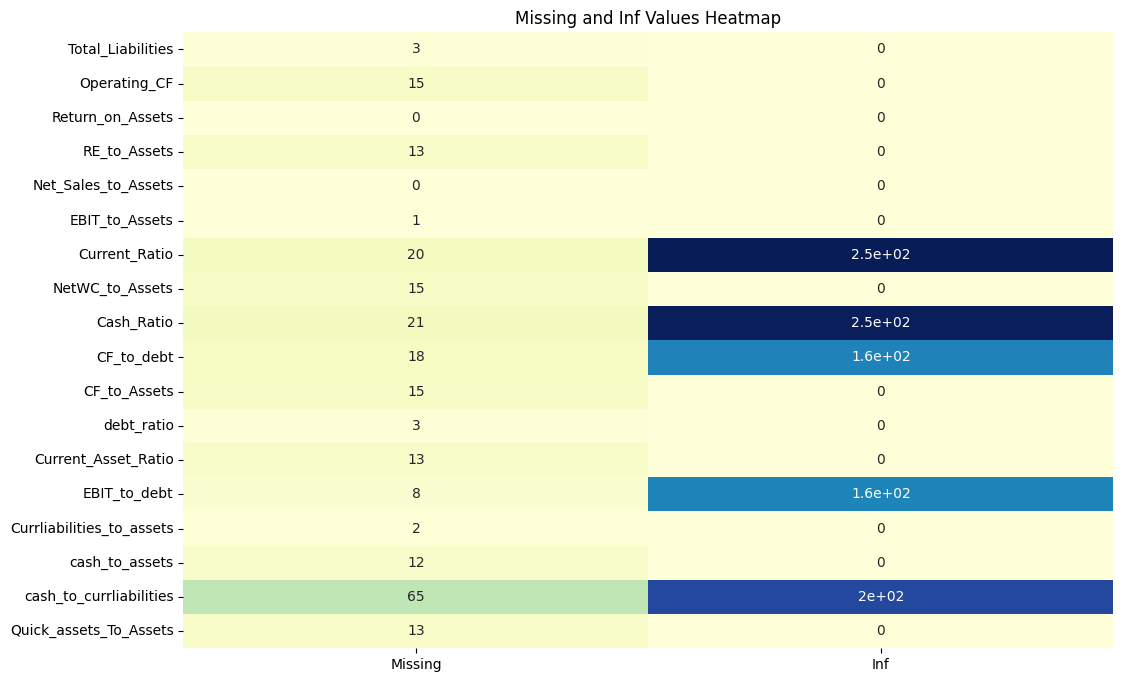

In [ ]:
predictor_columns = [
    'Total_Liabilities', 'Operating_CF', 'Return_on_Assets', 'RE_to_Assets', 'Net_Sales_to_Assets', 'EBIT_to_Assets',
    'Current_Ratio', 'NetWC_to_Assets', 'Cash_Ratio', 'CF_to_debt', 'CF_to_Assets', 'debt_ratio', 'Current_Asset_Ratio',
    'EBIT_to_debt', 'Currliabilities_to_assets', 'cash_to_assets', 'cash_to_currliabilities','Quick_assets_To_Assets'
]

# Create a DataFrame indicating missing and inf values
missing_inf_df = pd.DataFrame(index=predictor_columns)

# Fill the DataFrame with zeros (no missing or inf values)
missing_inf_df['Missing'] = 0
missing_inf_df['Inf'] = 0

# Find missing (NaN) values and inf values in the DataFrame
for column in predictor_columns:
    missing_inf_df.at[column, 'Missing'] = data[column].isnull().sum()
    missing_inf_df.at[column, 'Inf'] = np.isinf(data[column]).sum()

# Create a heatmap to visualize missing and inf values
plt.figure(figsize=(12, 8))
sns.heatmap(missing_inf_df, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Missing and Inf Values Heatmap')
plt.show()

In [ ]:
missing_counts = {}
inf_counts = {}
for column in predictor_columns:
    missing_counts[column] = data[column].isnull().sum()
    inf_counts[column] = np.isinf(data[column]).sum()

missing_counts_df = pd.DataFrame(missing_counts, index=['Missing Count'])
inf_counts_df = pd.DataFrame(inf_counts, index=['Inf Count'])

# Create a mask to identify rows with at least one missing or inf value in predictor columns
rows_with_missing_or_inf = data[predictor_columns].isnull().any(axis=1) | data[predictor_columns].apply(np.isinf).any(axis=1)

missing_or_inf_df = data[rows_with_missing_or_inf]

# Print the missing and inf value counts and the DataFrame with affected observations
print("Missing Value Counts:")
print(missing_counts_df)
print("\nInf Value Counts:")
print(inf_counts_df)
print("\nDataFrame with Observations Containing Missing or Inf Values:")
missing_or_inf_df.head(10)

Missing Value Counts:
               Total_Liabilities  Operating_CF  Return_on_Assets  \
Missing Count                  3            15                 0   

               RE_to_Assets  Net_Sales_to_Assets  EBIT_to_Assets  \
Missing Count            13                    0               1   

               Current_Ratio  NetWC_to_Assets  Cash_Ratio  CF_to_debt  \
Missing Count             20               15          21          18   

               CF_to_Assets  debt_ratio  Current_Asset_Ratio  EBIT_to_debt  \
Missing Count            15           3                   13             8   

               Currliabilities_to_assets  cash_to_assets  \
Missing Count                          2              12   

               Quick_assets_To_Assets  
Missing Count                      13  

Inf Value Counts:
           Total_Liabilities  Operating_CF  Return_on_Assets  RE_to_Assets  \
Inf Count                  0             0                 0             0   

           Net_Sales_to

,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,Internal_FinPerformance,Financ_res_Extent,Profit_AfterExp,Taxes,NetProfit,Intangible FxdA,Machinery&Equipment,Tangible FxdA,Financial_Assets,Total_FxdA,Total_CurrA,Total_Assets,Total_Equity,Untaxed_Reserves,Provisions,Curr_Liabilities,Total_Curr_Liabilities,Non_Curr_Liabilities,Total_Non_curr_lia,Total_Equity&Liab,Net_Sales,Other_Oper_incom,Depreciation,Personnel_Expenses,Comparability_items,Other_oper_exp,Total_appropriations,Employees,Sales_per_Employee,VA_per_Employee,Change_in_Sales,Inventory,Salaries,Value_Added,Social_Security,Total_Inventories,Total_receivables,Securities_Investments,CashnBank,Dividend,Production_Costs,rr08d_resand,rr08a_rteinknc,rr08b_rteinext,rr08c_rteinov,rr09a_rtekoknc,rr09b_rtekoext,rr09c_rtekoov,rr13a_extraint,rr13b_extrakos,rr13c_kncbdr,rr13d_agtsk,rr13e_bsldisp,br02a_byggmark,br02b_matanlov,br01a_foubautg,br01b_patlic,br01c_goodwill,br01d_imanlov,br04a_andknc,br04b_lfordknc,br04c_landelag,br04d_fianltov,br06a_pagarb,br06b_lagerov,br06d_kundford,br06e_kfordknc,br06f_kfordov,br10a_aktiekap,br10b_overkurs,br10c_uppskr,br10d_ovrgbkap,Accumulated_profit,br10f_kncbdrel,br10g_agtskel,br10h_resarb,br13a_ksklev,br13b_kskknc,br13c_kskov,br15a_lskknc,br15b_lskov,Asset_Turnover_ratio,ROA,Interest_on_Debt,Debt_to_Equity,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin,Total_Liabilities,Operating_CF,Return_on_Assets,RE_to_Assets,Net_Sales_to_Assets,EBIT_to_Assets,Current_Ratio,NetWC_to_Assets,Cash_Ratio,CF_to_debt,CF_to_Assets,debt_ratio,Current_Asset_Ratio,EBIT_to_debt,Currliabilities_to_assets,cash_to_assets,cash_to_currliabilities,Quick_assets_To_Assets
649,5560741448,2000,11661,180.0,0,30,1,-77.0,0,0,0,0,-77.0,0.0,-77,0.0,65.0,65.0,0.0,65.0,23.0,88,88.0,0,0,0.0,0.0,0.0,0.0,88.0,1229,0.0,0,0,0,-1306,0,1,1229.0,-77.0,-0.368772,0.0,0.0,-77,0.0,0.0,0.0,0.0,23.0,0,-1306.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,65.0,0.0,0.0,-77.0,0.0,0.0,0.0,0.0,0.0,13.965909,-0.875000,NaN,0.000000,0.018714,NaN,-0.062653,-0.062653,-0.062653,0.0,-100.0,-0.875000,0.738636,13.965909,-0.875000,inf,0.261364,inf,-inf,-1.136364,0.0,0.261364,-inf,0.0,0.261364,inf,0.261364
650,5560741448,2001,11661,180.0,0,30,0,-8.0,0,0,0,0,-8.0,0.0,-8,0.0,65.0,65.0,0.0,65.0,16.0,81,80.0,0,0,0.0,0.0,0.0,0.0,81.0,7,0.0,0,0,0,-15,0,0,NaN,NaN,-0.994304,11.0,0.0,-8,0.0,0.0,11.0,0.0,4.0,0,-15.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,7.0,100.0,0.0,0.0,0.0,-12.0,0.0,0.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.086420,-0.098765,0.0,0.012500,2.285714,NaN,-1.142857,-1.142857,-1.142857,0.0,-24.0,-0.098765,-0.148148,0.086420,-0.098765,inf,0.197531,inf,-inf,-0.296296,0.0,0.197531,-inf,0.0,0.049383,inf,0.061728
1186,5561017145,2002,27141,1286.0,0,30,0,3144.0,0,0,0,0,3144.0,0.0,3144,25.0,347.0,684.0,0.0,708.0,192.0,900,900.0,0,0,0.0,0.0,0.0,0.0,900.0,3144,0.0,0,0,0,0,0,0,NaN,NaN,0.046605,183.0,0.0,3144,0.0,125.0,58.0,0.0,9.0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0,0,337.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,58.0,100.0,0.0,0.0,0.0,-2344.0,0.0,0.0,3144.0,0.0,0.0,0.0,0.0,0.0,3.493333,3.493333,NaN,0.000000,0.061069,NaN,1.000000,1.000000,1.000000,0.0,2952.0,3.493333,-2.604444,3.493333,3.493333,inf,0.213333,inf,inf,3.280000,0.0,0.213333,inf,0.0,0.010000,inf,0.010000
3318,5561912014,2013,13335,182.0,0,30,0,16.0,0,0,0,0,16.0,0.0,16,0.0,0.0,0.0,0.0,0.0,366.0,366,366.0,0,0,0.0,0.0,0.0,0.0,366.0,17,0.0,0,0,0,-1,0,0,NaN,NaN,NaN,7.0,0.0,16,0.0,0.0,7.0,0.0,359.0,0,-1.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,100.0,0.0,0.0,20.0,230.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.046448,0.043716,NaN,0.000000,21.529412,NaN,0.941176,0.941176,0.941176,0.0,-350.0,0.043716,0.628415,0.046448,0.043716,inf,1.000000,inf,-inf,-0.956284,0.0,1.000000,inf,0.0,0.980874,inf,0.980874
3319,5561912014,2014,13335,182.0,0,30,0,

In [ ]:
grouped_count = data.groupby('Bankrupt')[['Total_Liabilities', 'Operating_CF', 'Return_on_Assets', 'RE_to_Assets', 'Net_Sales_to_Assets', 'EBIT_to_Assets',
    'Current_Ratio', 'NetWC_to_Assets', 'Cash_Ratio', 'CF_to_debt', 'CF_to_Assets', 'debt_ratio', 'Current_Asset_Ratio',
    'EBIT_to_debt', 'Currliabilities_to_assets', 'cash_to_assets', 'Quick_assets_To_Assets']].apply(lambda x: x.isna().sum())
print(grouped_count)

          Total_Liabilities  Operating_CF  Return_on_Assets  RE_to_Assets  \
Bankrupt                                                                    
0                         3            15                 0            13   
1                         0             0                 0             0   

          Net_Sales_to_Assets  EBIT_to_Assets  Current_Ratio  NetWC_to_Assets  \
Bankrupt                                                                        
0                           0               1             20               15   
1                           0               0              0                0   

          Cash_Ratio  CF_to_debt  CF_to_Assets  debt_ratio  \
Bankrupt                                                     
0                 21          18            15           3   
1                  0           0             0           0   

          Current_Asset_Ratio  EBIT_to_debt  Currliabilities_to_assets  \
Bankrupt                                   

In [ ]:
#Dealing with infinite values and droping missing values
data.replace([np.inf, -np.inf], 0, inplace=True)
data = data.dropna(subset=['Total_Liabilities', 'Operating_CF', 'Return_on_Assets', 'RE_to_Assets', 'Net_Sales_to_Assets', 'EBIT_to_Assets',
    'Current_Ratio', 'NetWC_to_Assets', 'Cash_Ratio', 'CF_to_debt', 'CF_to_Assets', 'debt_ratio', 'Current_Asset_Ratio',
    'EBIT_to_debt', 'Currliabilities_to_assets', 'cash_to_assets', 'Quick_assets_To_Assets'])
print(data['Bankrupt'].value_counts())
print(data.shape)
data.groupby('Bankrupt')['ORGNR'].nunique()


Bankrupt
0    90925
1      335
Name: count, dtype: int64
(91260, 118)


Bankrupt
0    10686
1      335
Name: ORGNR, dtype: int64

In [ ]:
#UNIVARIATE ANALYSIS
log_df=data[predictor_columns]
log_df['Bankrupt']=data['Bankrupt']
log_df.head()

<ipython-input-47-ce1b81b68a5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['Bankrupt']=data['Bankrupt']


,Total_Liabilities,Operating_CF,Return_on_Assets,RE_to_Assets,Net_Sales_to_Assets,EBIT_to_Assets,Current_Ratio,NetWC_to_Assets,Cash_Ratio,CF_to_debt,CF_to_Assets,debt_ratio,Current_Asset_Ratio,EBIT_to_debt,Currliabilities_to_assets,cash_to_assets,Quick_assets_To_Assets,Bankrupt
0,3967.0,-607.0,-0.096211,0.000000,0.452974,-0.092722,0.908232,-0.011299,0.836707,-0.153012,-0.100864,0.659189,0.111831,-0.140660,0.123131,0.026587,0.026587,0
1,4738.0,-724.0,-0.111147,0.000000,0.466852,-0.103781,0.953984,-0.006711,0.882155,-0.152807,-0.118514,0.775577,0.139139,-0.133812,0.145850,0.020134,0.020134,0
2,4595.0,-327.0,0.342512,0.000000,0.292065,0.400315,5.855956,0.368471,5.764543,-0.071164,-0.034367,0.482922,0.444351,0.828945,0.075880,0.017236,0.017341,0
3,3917.0,-2603.0,-0.110433,0.423412,0.341821,-0.149019,3.203704,0.216448,3.108466,-0.664539,-0.338184,0.508900,0.314668,-0.292826,0.098220,0.026764,0.224113,0
4,3475.0,-1612.0,-0.203350,0.399569,0.400564,-0.207331,1.590099,0.049428,1.441584,-0.463885,-0.267374,0.576381,0.133190,-0.359712,0.083762,0.012108,0.012108,0


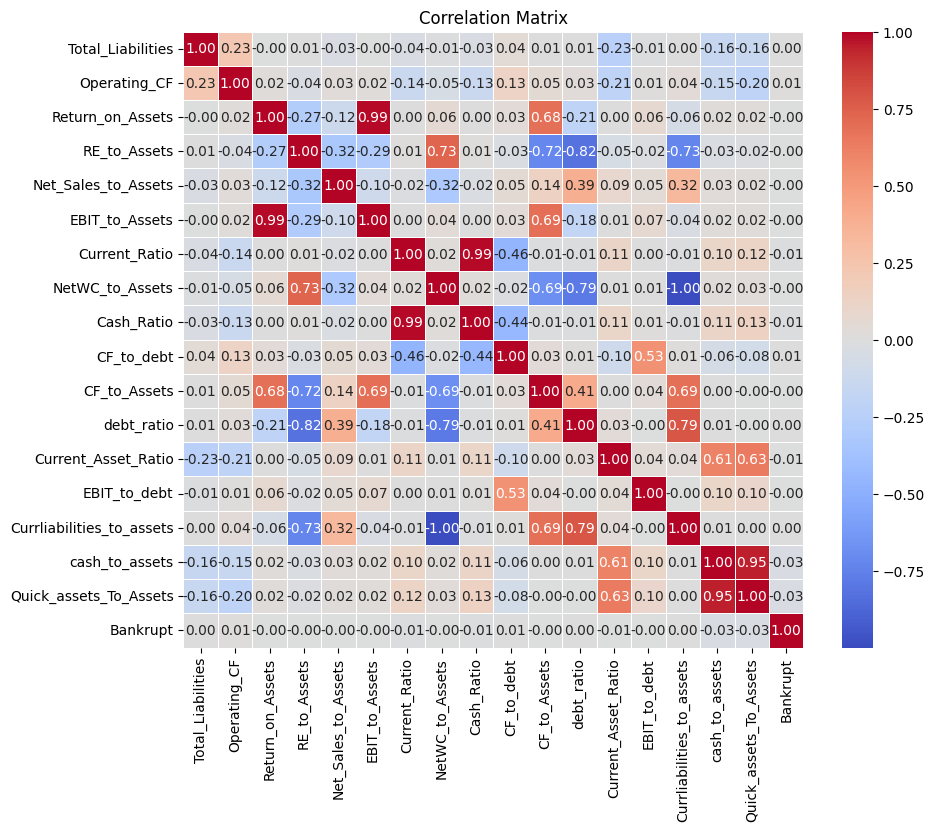

In [ ]:
log_df.describe()
correlation_matrix = log_df.corr()  # This calculates the Pearson correlation by default
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

X_train,X_test,y_train,y_test=train_test_split(log_df[predictor_columns],log_df['Bankrupt'],test_size=0.2,random_state=42)

#SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



model= LogisticRegression(solver='saga', C=0.1, max_iter=5000, verbose=1)
model.fit(X_train_smote,y_train_smote)


max_iter reached after 424 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, max_iter=5000, solver='saga', verbose=1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the  model: {accuracy:.2f}")


Accuracy of the  model: 0.82


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[14934  3251]
 [   32    35]]


In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
auc=roc_auc_score(y_test,y_prob)
auc

0.6997960431551344

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     18185
           1       0.01      0.52      0.02        67

    accuracy                           0.82     18252
   macro avg       0.50      0.67      0.46     18252
weighted avg       0.99      0.82      0.90     18252



### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)  # You can adjust the number of trees and other parameters
RF_model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred=RF_model.predict(X_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18185
           1       0.03      0.07      0.04        67

    accuracy                           0.99     18252
   macro avg       0.51      0.53      0.52     18252
weighted avg       0.99      0.99      0.99     18252

Confusion Matrix:
[[18011   174]
 [   62     5]]
Accuracy Score: 0.9870699101468332


### XGboost

In [ ]:
from xgboost import XGBClassifier
XG_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
XG_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions
y_pred = XG_model.predict(X_test)

# Evaluate predictions
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9672364672364673
Confusion Matrix:
[[17647   538]
 [   60     7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18185
           1       0.01      0.10      0.02        67

    accuracy                           0.97     18252
   macro avg       0.50      0.54      0.50     18252
weighted avg       0.99      0.97      0.98     18252



### Support Vector Machines(SVM)

In [ ]:
from sklearn.svm import SVC
# Initialize SVM classifier
SVM_model = SVC(kernel='linear')  # You can change the kernel based on your data; common choices: 'linear', 'poly', 'rbf', 'sigmoid'

# Train the model
SVM_model.fit(X_train_smote, y_train_smote)


In [ ]:
# Make predictions
y_pred = SVM_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


### Dealing with the imbalance in dataset

In [ ]:
#Trying undersampling of majority class
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

# Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

model= LogisticRegression(solver='saga', C=0.1, max_iter=5000, verbose=1)
model.fit(X_rus, y_rus)



y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

max_iter reached after 1 seconds
Accuracy: 0.7995836072759149
Confusion Matrix:
[[14562  3623]
 [   35    32]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     18185
           1       0.01      0.48      0.02        67

    accuracy                           0.80     18252
   macro avg       0.50      0.64      0.45     18252
weighted avg       0.99      0.80      0.89     18252



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#Combining SMOTE and Random Undersampling

from imblearn.pipeline import Pipeline

# Define SMOTE and RandomUnderSampler
over = SMOTE(sampling_strategy=0.1, random_state=42)  # Adjust these parameters as necessary
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Adjust these parameters as necessary

# Logistic Regression model
model = Pipeline([
    ('over', over),
    ('under', under),
    ('model', LogisticRegression(solver='saga',  C=0.1,random_state=42,max_iter=10000,verbose=1))
])

# Train the model
model.fit(X_train, y_train)




y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

convergence after 8271 epochs took 56 seconds
Accuracy: 0.9540872233179926
Confusion Matrix:
[[17407   778]
 [   60     7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     18185
           1       0.01      0.10      0.02        67

    accuracy                           0.95     18252
   macro avg       0.50      0.53      0.50     18252
weighted avg       0.99      0.95      0.97     18252



In [ ]:

# Cluster Centroids
cc = ClusterCentroids(random_state=42)
X_cc, y_cc = cc.fit_resample(X_train, y_train)
model= LogisticRegression(solver='saga', C=0.1, max_iter=10000, verbose=1)
model.fit(X_cc, y_cc)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


max_iter reached after 1 seconds
Accuracy: 0.9894258163488933
Confusion Matrix:
[[18059   126]
 [   67     0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18185
           1       0.00      0.00      0.00        67

    accuracy                           0.99     18252
   macro avg       0.50      0.50      0.50     18252
weighted avg       0.99      0.99      0.99     18252



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#Applying ADASYN with logistic regression

from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Check the balance of the classes after ADASYN
print("After ADASYN, counts of label '1': {}".format(sum(y_train_adasyn == 1)))
print("After ADASYN, counts of label '0': {}".format(sum(y_train_adasyn == 0)))

model= LogisticRegression(solver='saga', C=0.1, max_iter=10000, verbose=1)
model.fit(X_train_adasyn, y_train_adasyn)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


After ADASYN, counts of label '1': 72827
After ADASYN, counts of label '0': 72740
convergence after 6423 epochs took 348 seconds
Accuracy: 0.8234166118781503
Confusion Matrix:
[[14994  3191]
 [   32    35]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     18185
           1       0.01      0.52      0.02        67

    accuracy                           0.82     18252
   macro avg       0.50      0.67      0.46     18252
weighted avg       0.99      0.82      0.90     18252



In [ ]:
#Applying ADASYN with random forests


RF_model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)  # You can adjust the number of trees and other parameters
RF_model.fit(X_train_adasyn, y_train_adasyn)
y_pred = RF_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9878917378917379
Confusion Matrix:
[[18025   160]
 [   61     6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18185
           1       0.04      0.09      0.05        67

    accuracy                           0.99     18252
   macro avg       0.52      0.54      0.52     18252
weighted avg       0.99      0.99      0.99     18252

